In [39]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import os
import json
import numpy as np
import re
import wget
import math
import httplib, urllib, base64

In [13]:
f = open('azure.keys', 'r')
keys = json.loads(f.read())
f.close()

In [19]:
key = keys['face']
headers = {'Content-Type': 'application/json', 'Ocp-Apim-Subscription-Key': key}

In [34]:
url = 'https://s3.amazonaws.com/dataskeptic-static/img/2016/san-jose-talk-1.jpg'

params = urllib.urlencode({
    # Request parameters
    'returnFaceId': 'true',
    'returnFaceLandmarks': 'false',
    'returnFaceAttributes': 'age'
})

try:
    conn = httplib.HTTPSConnection('westus.api.cognitive.microsoft.com')
    conn.request("POST", "/face/v1.0/detect?%s" % params, json.dumps({"url": url}), headers)
    response = conn.getresponse()
    data = response.read()
    conn.close()
except Exception as e:
    print("[Errno {0}] {1}".format(e.errno, e.strerror))

In [49]:
resp = json.loads(data)

In [55]:
print(data)

[{"faceId":"1a228680-7582-47ac-bc7b-029536e95468","faceRectangle":{"top":145,"left":466,"width":67,"height":67},"faceAttributes":{"age":45.0}},{"faceId":"d0ee8e65-07fd-4674-9210-d05816205839","faceRectangle":{"top":106,"left":729,"width":62,"height":62},"faceAttributes":{"age":33.8}},{"faceId":"92696f9e-1f94-4a79-be30-4ff88539d0bb","faceRectangle":{"top":129,"left":164,"width":61,"height":61},"faceAttributes":{"age":70.1}}]


In [40]:
fname = wget.download(url)

In [41]:
im = np.array(Image.open(fname), dtype=np.uint8)

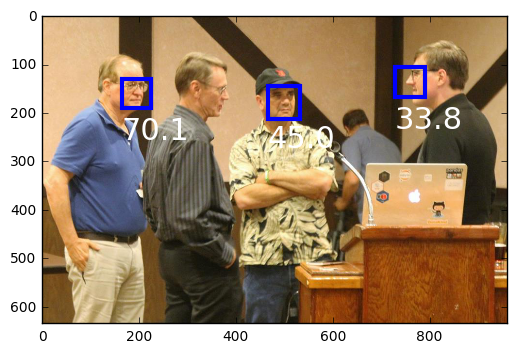

In [67]:
# Create figure and axes
fig,ax = plt.subplots(1)

# Display the image
ax.imshow(im)

# Create a Rectangle patch
for datum in resp:
    fr = datum['faceRectangle']
    x = fr['left']
    y = fr['top']
    w = fr['width']
    h = fr['height']
    age = datum['faceAttributes']['age']
    rect = patches.Rectangle((x,y),w,h,linewidth=3,edgecolor='blue',facecolor='none')
    ax.text(x-1, y+125, age, fontsize=22, color="white")
    ax.add_patch(rect)

plt.show()

In [60]:
datum

{u'faceAttributes': {u'age': 45.0},
 u'faceId': u'1a228680-7582-47ac-bc7b-029536e95468',
 u'faceRectangle': {u'height': 67, u'left': 466, u'top': 145, u'width': 67}}